In [354]:
#!c1.8
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
from ipywidgets import IntProgress
from tqdm import tqdm

from haversine import haversine, Unit

import warnings
warnings.filterwarnings("ignore")

In [689]:
#!c1.8

# Препроцессинг строк

import re

def preprocess(text: str):
    text1 = re.findall(r'[А-Я|A-Z|0-9|a-z]\w+', text)
    text2 = re.findall(r'[А-Я|A-Z|0-9|a-z]\w+\s[а-я|А-Я|A-Z|0-9|a-z|\S]\w+', text)
    text = max(text1, text2)
    p = ''
    for x in text:
        p+=x
    text = p
    text = text.lower()
    text = re.sub(r'[\.,]+', '', text)
    text = re.sub(r"\(.*\)", ' ', text)
    text = re.sub(r"[^\w\s]", ' ', text)
    text = re.sub(r'\b\w\b', ' ', text)
    text = re.sub(r'ооо|зао|ао|магазин|сеть|магазинов', ' ', text)
    text = ' '.join(text.split())
    return text

In [690]:
#!c1.8
from strsimpy.metric_lcs import MetricLCS

metric_lcs = MetricLCS()

def dist(text1, text2):
    return metric_lcs.distance(text1, text2)

In [357]:
#!c1.8
data = pd.read_csv('dataBD.csv')
data.drop(columns=['Unnamed: 0'], inplace=True)
data

,id,ST_X(location),ST_Y(location),status,updated,source,address,title
0,6816001,36.079817,52.981971,1,2016-02-11 22:41:51.194030+03:00,RNG-LEGACY,"улица Максима Горького, 82В, Орёл",Все для животных
1,6816002,36.079778,52.982026,1,2016-02-11 22:41:51.441460+03:00,RNG-LEGACY,"улица Максима Горького, 82А, Орёл",In Bloom
2,6816003,36.080652,52.982868,1,2016-02-11 22:41:51.704500+03:00,RNG-LEGACY,"улица Максима Горького, 84, Орёл",AutoStatus
3,7499653,76.567035,60.937610,1,2020-09-18 05:13:42.067346+03:00,SHOPS_2GIS,"Нижневартовск, Омская, 14а","Твэл, сеть магазинов"
4,6816005,36.081056,52.983134,1,2016-02-11 22:41:52.666420+03:00,RNG-LEGACY,"улица Максима Горького, 84, Орёл",Всеинструменты.ру
...,...,...,...,...,...,...,...,...
1375933,7409815,61.405214,55.183836,1,2020-09-18 03:48:44.161088+03:00,SHOPS_2GIS,"Челябинск, Победы проспект, 149","Люкс Вода, производственная фирма"
1375934,7409818,61.400585,55.183959,1,2020-09-18 03:48:45.069573+03:00,SHOPS_2GIS,"Челябинск, Победы проспект, 159","Пятёрочка, сеть супермаркетов"
1375935,7409821,61.399533,55.183137,1,2020-09-18 03:48:45.138898+03:00,SHOPS_2GIS,"Челябинск, Кирова, 1","Книжный город, сеть супермаркетов"
1375936,7409851,61.394352,55.157745,1,2020-09-18 03:48:47.064070+03:00,SHOPS_2GIS,"Челябинск, Воровского, 6","Связной, терминал"


In [366]:
#!c1.8
data = data.dropna()

In [ ]:
#!c1.8


In [ ]:
#!c1.8


Пример с нашим местоположением.

In [343]:
#!c1.8
lat, long = 55.78543033418173, 37.601773048416604

In [345]:
#!c1.8
test = data[(abs(data['ST_X(location)'] - long) <= 0.02) & (abs(data['ST_Y(location)'] - lat) <= 0.02)]
test

,id,ST_X(location),ST_Y(location),status,updated,source,address,title
5040,6821126,37.596053,55.797059,1,2016-02-13 19:07:50.076220+03:00,RNG-LEGACY,"Полковая улица, 3/4",Техноинжпромстрой ЗАО
5179,6821270,37.592513,55.799917,1,2016-02-13 20:31:21.788950+03:00,RNG-LEGACY,"с, улица Складочная, 1 строение 40, Москва","ООО ""Центр кованных изделий"""
5180,6821271,37.593223,55.799406,1,2016-02-13 20:31:22.051790+03:00,RNG-LEGACY,"улица Складочная, 1 строение 42, Москва",Пресс Пойнт Интернэшнл
5181,6821272,37.593223,55.799406,1,2016-02-13 20:31:22.323650+03:00,RNG-LEGACY,"улица Складочная, 1 строение 42, Москва",Инструментик
5182,6821273,37.593223,55.799406,1,2016-02-13 20:31:22.599930+03:00,RNG-LEGACY,"улица Складочная, 1, строение 41/1, Москва",Fashion File
...,...,...,...,...,...,...,...,...
1375538,7401590,37.591284,55.772433,1,2020-09-18 03:41:09.271317+03:00,SHOPS_2GIS,"Москва, Тверская-Ямская 1-я, 11","Титан, спортивно-туристический клуб"
1375549,7401074,37.581991,55.778797,1,2020-09-18 03:40:55.123102+03:00,SHOPS_2GIS,"Москва, Ленинградский проспект, 4/2","Francesco Donni, сеть салонов обуви"
1375551,7401508,37.618799,55.803385,1,2020-09-18 03:41:06.240013+03:00,SHOPS_2GIS,"Москва, Шереметьевская, 20","АШАН Сити, сеть гипермаркетов"
1375552,7401556,37.594164,55.797007,1,2020-09-18 03:41:08.067224+03:00,SHOPS_2GIS,"Москва, Сущёвский Вал, 5 ст11","Ничего подобного, секонд-хенд"


In [367]:
#!c1.8
gis = data[data.source == 'SHOPS_2GIS']
notgis = data[data.source != 'SHOPS_2GIS']

gis.shape, notgis.shape

((167745, 8), (1199065, 8))

In [368]:
#!c1.8
import warnings
warnings.filterwarnings("ignore")

In [374]:
#!c1.8
dist('asd', 'qwe') 

1.0

In [369]:
#!c1.8
import time
from multiprocessing import Pool        Тут можно распараллелить вычисления

start = time.time()
cross = {}
pool = Pool(8)

for row1 in tqdm(gis.values):
    #print(row1[7])
    try:
        
        title_gis = preprocess(row1[7])            # Препроцессинг строки

        id_gis = row1[0]

        cross[id_gis] = {}

        pool.map(distance, notgis.values)

        for row2 in notgis.values:

            try:
                #print(row2[7])
                title_notgis = preprocess(row2[7])          # Препроцессинг строки

                id_notgis = row2[0]

                distan = dist(title_gis, title_notgis)           # Пересечение строк по нормированному Левенштейну

                if distan < 0.5:                       # Первый фильтр
                    cross[id_gis][id_notgis] = distan
                    
            except Exception as exp:
                print(exp)
                continue
                
    except Exception as exp:
        print(exp)
        continue

elapsed_time_fl = (time.time() - start) 
elapsed_time_fl

  0%|          | 3/167745 [02:02<1908:25:05, 40.96s/it]


KeyboardInterrupt: 

In [350]:
#!M
import time
#from multiprocessing import Pool

start = time.time()

dist_test = {}

#pool = Pool(32)

for id_gis in tqdm(cross):

    long1, lat1 = test_gis[test_gis.id == id_gis]['ST_X(location)'], test_gis[test_gis.id == id_gis]['ST_Y(location)']
    loc1 = (long1, lat1)
    
    dist_test[id_gis] = {}
    #print(dist)

    #pool.map(distance, notgis.values)
    
    for id_notgis in cross[id_gis]:
    
        long2, lat2 = test_notgis[test_notgis.id == id_notgis]['ST_X(location)'], test_notgis[test_notgis.id == id_notgis]['ST_Y(location)']
        loc2 = (long2, lat2)

        dis = haversine(loc1, loc2, Unit.METERS)            # Расстояние в метрах между двумя точками

        if dis < 2000:                           # Фильтр по расстоянию между точками (в метрах)
            dist_test[id_gis][id_notgis] = (dis, cross[id_gis][id_notgis])

elapsed_time_fl = (time.time() - start) 
elapsed_time_fl

100%|██████████| 562/562 [00:06<00:00, 93.24it/s]


6.030280828475952

In [351]:
#!M

# Удаляем магазины, которые не имеют пар

dist2_test = {}
for key in tqdm(dist_test.keys()):
    if len(dist_test[key]) > 0: 
        dist2_test[key] = dist_test[key].copy()
len(dist2_test.keys())

100%|██████████| 562/562 [00:00<00:00, 1935.64it/s]


466

In [352]:
#!M

# Создаём датафрейм из пар магазинов

id1 = []
id2 = []
distan = []
title_cross = []
title1 = []
title2 = []
address1 = []
address2 = []

for id_gis in tqdm(dist2_test):
    for id_notgis in dist2_test[id_gis]:
        
        id1.append(id_gis)
        title1.append(test_gis[test_gis.id == id_gis].title.values[0])
        address1.append(test_gis[test_gis.id == id_gis].address.values[0])
        
        id2.append(id_notgis)
        title2.append(test_notgis[test_notgis.id == id_notgis].title.values[0])
        address2.append(test_notgis[test_notgis.id == id_notgis].address.values[0])

        distan.append(dist2_test[id_gis][id_notgis][0])
        title_cross.append(dist2_test[id_gis][id_notgis][1])
        
data_merge = pd.DataFrame({'id_old': id2, 'title_old': title2, 'address_old': address2, 'title_gis': title1, 'address_gis': address1, 'distance': distan, 'title_cross': title_cross})

del id1
del id2
del distan
del title_cross
del title1
del title2
del address1
del address2 

data_merge

100%|██████████| 466/466 [00:05<00:00, 87.13it/s]


,id_old,title_old,address_old,title_gis,address_gis,distance,title_cross
0,7501689,"АО ""ШИЛЛЕР.РУ""","1-я Ямского Поля улица, 15, 401","ШИЛЛЕР.РУ, торговая фирма","Москва, Ямского Поля 1-я, 15",28.959808,0.250000
1,7028163,Столичный Ломбард,"Сущевская улица, 22, Москва",Социальный ломбард,"Москва, Бутырская, 2/18",1985.466005,0.222222
2,7113449,Социальные Аптеки № 215,"Тихвинская улица, 17, Центральный АО",Социальный ломбард,"Москва, Бутырская, 2/18",1537.921383,0.388889
3,7113452,Социальная Аптека,"Тихвинская улица, 17c1, Москва",Социальный ломбард,"Москва, Бутырская, 2/18",1511.839336,0.444444
4,7934890,Копировальный центр «Копирка»,"1-я Тверская-Ямская улица, 29 строение 1, Москва",Социальный ломбард,"Москва, Бутырская, 2/18",1637.677526,0.473684
...,...,...,...,...,...,...,...
2397,7312004,Ничего Подобного,"улица Правды, 24, Северный АО","Ничего подобного, секонд-хенд","Москва, Сущёвский Вал, 5 ст11",1516.648765,0.000000
2398,7034702,"ORTOPEDIA, сеть магазинов детской обуви","Строение 11, ulitsa Sushchevskiy Val, 5, А07 п...","Ortopedia, магазин","Москва, Сущёвский Вал, 5 ст9",1680.859813,0.000000
2399,7501775,Ortomed.ru,"スセフスキー・ヴァル通り, 5, к. 20, ТК Савеловский, п-н S4...","Ortopedia, магазин","Москва, Сущёвский Вал, 5 ст9",298.535931,0.333333
2400,7812875,Rc-today,"3-й проезд Марьиной Рощи, 40/1, Москва","Ortopedia, магазин","Москва, Сущёвский Вал, 5 ст9",1848.091441,0.444444


In [353]:
#!M

# Делаем последнюю фильтрацию по пересечению и расстоянию. Можно менять значения. Кроме того, тут реализован поиск наиподходящих пар.

df = data_merge[(data_merge.title_cross < 0.2) & (data_merge.distance < 300)].reset_index().drop(columns=['index']).groupby(['id_old']).agg('min')
df

,title_old,address_old,title_gis,address_gis,distance,title_cross
id_old,,,,,,
6877005,Керамотека,"к., 1-й Щемиловский переулок, 17 строение 1, М...","Керамотека, салон-магазин","Москва, Щемиловский 1-й переулок, 17 ст1",15.948651,0.0
6882018,ГОРЗДРАВ,"Лесная улица, 8/12, Москва","ГОРЗДРАВ, сеть аптек","Москва, Лесная, 8/12",26.771768,0.0
6932329,"Вторая Жизнь, Магазин","Большая Грузинская улица, 58, Москва","Вторая жизнь, сеть комиссионных магазинов элит...","Москва, Большая Грузинская, 58",32.134240,0.0
6973607,"МТС, сеть салонов связи","1-я Тверская-Ямская улица, 8, Москва","МТС, сеть салонов связи","Москва, Тверская-Ямская 1-я, 8",15.226201,0.0
7009260,"Асна, сеть аптек","улица Красина, 24/28, Москва","АСНА, сеть аптек","Москва, Красина, 24-28",32.252413,0.0
...,...,...,...,...,...,...
27005475,"ООО ""Вкусвилл""","Бутырская ул., 4, Москва, Россия, 127015","ВкусВилл, сеть супермаркетов здорового питания","Москва, Бутырская, 2/18",122.805972,0.0
27042444,"АО ""Дикси ЮГ"" Дикси-77498","Садовая-Каретная ул., 20, Москва, Россия, 127051","ДИКСИ, сеть супермаркетов","Москва, Садовая-Каретная, 20 ст1",91.694273,0.0
29026376,"АО ""Дикси ЮГ"" ДИКСИ-77375","Лесная ул., 45, Москва, Россия, 127055","ДИКСИ, сеть супермаркетов","Москва, Лесная, 45/1",16.927677,0.0


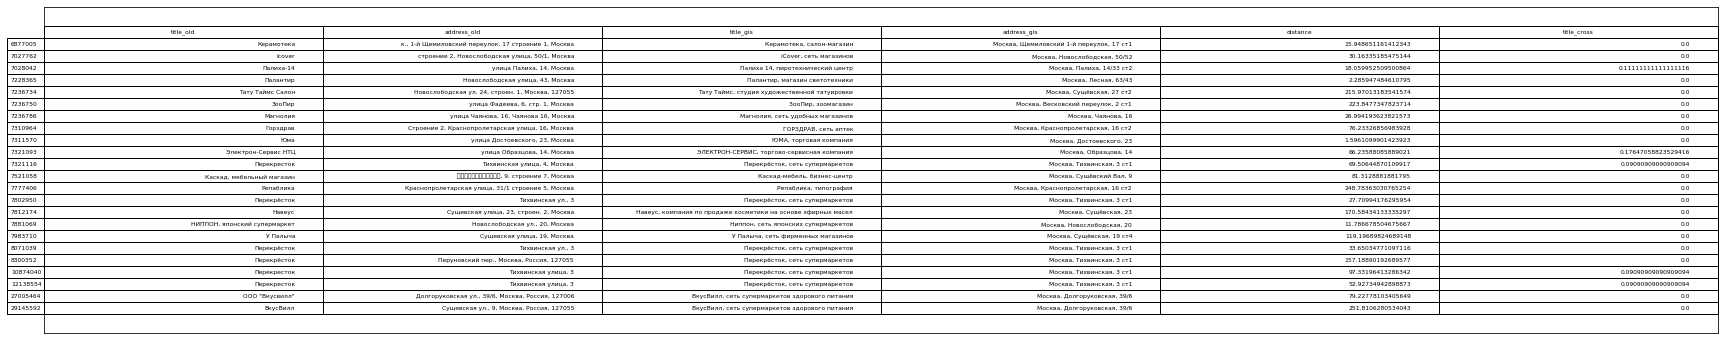

In [146]:
#!M
import matplotlib.pyplot as plt
from pandas.plotting import table 

fig, ax = plt.subplots(figsize=(30, 6)) # no visible frame
ax.xaxis.set_visible(False)  # hide the x axis
ax.yaxis.set_visible(False)

table(ax, df, loc='center')

fig.savefig('table.png')

In [180]:
#!M
import subprocess

df.to_html('merge2.html')
subprocess.call('wkhtmltoimage -f png --width 0 merge2.html merge2.png', shell=True)

127

In [181]:
#!M
import subprocess

test.to_html('merge0.html')
subprocess.call('wkhtmltoimage -f png --width 0 merge0.html merge0.png', shell=True)

127

In [182]:
#!M
import subprocess

data_merge.to_html('merge1.html')
subprocess.call('wkhtmltoimage -f png --width 0 merge1.html merge1.png', shell=True)

127

In [154]:
#!M
test.shape[0], len(cross.keys()), len(dist2_test.keys()), data_merge.shape[0], df.shape[0]

(1413, 152, 97, 338, 23)

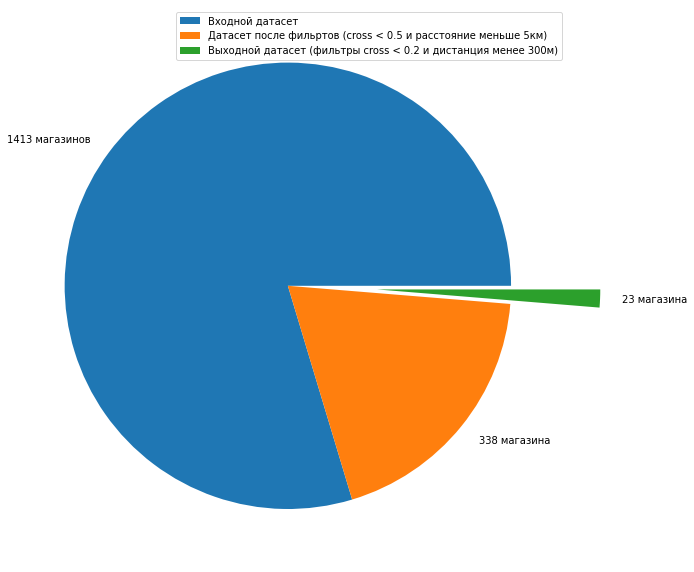

In [177]:
#!M
fig, ax = plt.subplots(figsize=(10,20))
fig.patch.set_facecolor('white')

titles = ['Входной датасет', 'Датасет после фильртов (cross < 0.5 и расстояние меньше 5км)', 'Выходной датасет (фильтры cross < 0.2 и дистанция менее 300м)']

ax.pie([test.shape[0], data_merge.shape[0], df.shape[0]], explode = [0, 0, 0.4], labels = [f'{test.shape[0]} магазинов', f'{data_merge.shape[0]} магазина', f'{df.shape[0]} магазина'])
plt.legend(['Входной датасет', 'Датасет после фильртов (cross < 0.5 и расстояние меньше 5км)', 'Выходной датасет (фильтры cross < 0.2 и дистанция менее 300м)'])

In [17]:
#!M


In [ ]:
#!c1.8


In [ ]:
#!c1.8


In [ ]:
#!c1.8


In [ ]:
#!c1.8


In [ ]:
#!c1.8


In [ ]:
#!c1.8


РАБОЧИЙ КОД

In [529]:
#!c1.8
data = data.dropna()
data = data.drop_duplicates(subset=['address', 'title', 'source'])
data.shape

(1322341, 8)

In [533]:
#!c1.8
gis = data[data.source == 'SHOPS_2GIS'].reset_index().drop(columns=['index'])
notgis = data[data.source != 'SHOPS_2GIS'].reset_index().drop(columns=['index'])

gis.shape[0], notgis.shape[0]

(162002, 1160339)

In [ ]:
#!c1.8


In [538]:
#!c1.8
for i in tqdm(range(32)):
    notgis[ int(notgis.shape[0]*i/32) : int(notgis.shape[0]*(i+1)/32) ].to_csv(f'datas of merge notgis/notgis{i+1}.csv')

100%|██████████| 32/32 [00:09<00:00,  3.54it/s]


In [534]:
#!c1.8
notgis[:2]

,id,ST_X(location),ST_Y(location),status,updated,source,address,title
0,6816001,36.079817,52.981971,1,2016-02-11 22:41:51.194030+03:00,RNG-LEGACY,"улица Максима Горького, 82В, Орёл",Все для животных
1,6816002,36.079778,52.982026,1,2016-02-11 22:41:51.441460+03:00,RNG-LEGACY,"улица Максима Горького, 82А, Орёл",In Bloom


In [ ]:
#!c1.8


In [655]:
#!c1.8
notgis = pd.read_csv('datas of merge notgis/notgis2.csv').drop(columns=['Unnamed: 0'])
notgis

,id,ST_X(location),ST_Y(location),status,updated,source,address,title
0,6858010,36.569683,50.640999,1,2016-03-03 19:39:25.200800+03:00,RNG-LEGACY,"Богдана Хмельницкого проспект, 164, Белгород","Quiz, магазин"
1,6858011,36.503831,50.779384,1,2016-03-03 19:39:49.786720+03:00,RNG-LEGACY,"Магистральная улица, 1, Строитель",Профессионал
2,30761699,50.037351,58.689507,1,2021-03-19 21:27:54.801931+03:00,RNG-RECEIPT,"ул. Кирова, 22, Вахруши, Кировская обл., Росси...",АО 'Тандер'
3,6858013,36.602416,50.565063,1,2016-03-03 19:40:20.020260+03:00,RNG-LEGACY,"Шумилова улица, 16, Белгород",Агро-Белогорье
4,6858015,36.581145,50.601530,1,2016-03-03 19:40:30.356440+03:00,RNG-LEGACY,"Народный бульвар, 101, Белгород","99999, Салон Парфюмерии И Косметики"
...,...,...,...,...,...,...,...,...
36256,6900528,36.879266,37.412773,1,2016-03-30 19:04:33.921930+03:00,RNG-LEGACY,"Şehit Ali Mahallesi, Balsuyu Bulvarı, Kılılı B...",Kılıç Market
36257,6900529,36.879321,37.411976,1,2016-03-30 19:04:34.206650+03:00,RNG-LEGACY,"Şehit Şeref Mahallesi, Belediye Bulvarı, Kılıl...",Meltem Pastanesi
36258,6900530,36.879296,37.411909,1,2016-03-30 19:04:34.501430+03:00,RNG-LEGACY,"Şehit Şeref Mahallesi, Belediye Bulvarı, Kılıl...",Karagöz Kuyumculuk
36259,6900531,55.927821,54.676260,1,2016-03-30 19:05:20.506810+03:00,RNG-LEGACY,"Ulitsa Rubejnaya Dom, Рубежная улица, 174, Уфа",Pimkie - Ufa - Centre Commercial Mega


In [669]:
#!c1.8

# Функция, что бы распараллеливать вычисления. Заходит сюда строка из датафрейма.

def search(row1):
    
    #notgis = pd.read_csv('datas of merge notgis/notgis2.csv').drop(columns=['Unnamed: 0'])
    #print(1)
    
    #print(row1[7])
    
    #title_gis = preprocess(row1[7])
    
    #id_gis = row1[0]
    
    #cross[id_gis] = {}
    try:

        title_gis = preprocess(row1[7])

        #print(2)

        cros = {}

        #print(3)

        id_gis = row1[0]

        #print(4)

        cros[id_gis] = {}

        #print(5)

        #print(notgis.values[:2])

        for row2 in notgis.values:
            #print(row2)
            try:
                title_notgis = preprocess(row2[7])

                #print(title_notgis)

                id_notgis = row2[0]

                #print(title_gis, title_notgis)

                distan = dist(title_gis, title_notgis)

                #print(distan)

                if distan < 0.25:
                    cros[id_gis][id_notgis] = distan
            except Exception as exp:
                cros[id_gis][id_notgis] = 1
                print(exp)
        #print(cross)
        return cros
    except Exception as exp:
        return {1234567890: {12345678: 1}}

In [672]:
#!c1.8

# Надо чуть-чуть поправить распараллеливание. 

import warnings
warnings.filterwarnings("ignore")

import pickle

import time
from multiprocessing import Pool

start = time.time()
#cross = {}

#try:
#    with Pool(processes=8) as pool:
#        out = pool.map(search, gis.values[:8])
#        print(out, '-------------------')
#finally:
#    pool.join()
    
try:
    with Pool(4) as pool:
        cross=pool.map(search, gis.values)
finally:
    pool.join()
    
#print('joined', cross)
    
#out = pool.map(search, gis.values[:8])
    
#print(cross)

with open(f'titlecross/cross{2}.pickle', 'wb') as f:
    pickle.dump(cross, f)                       

elapsed_time_fl = (time.time() - start) 
elapsed_time_fl

80912.03022646904

In [548]:
#!c1.8
with open('titlecross/cross2.pickle', 'rb') as f:
    data_new = pickle.load(f)
data_new

[{7499653: {6827872: 0.4, 6842778: 0.4, 6846681: 0.4}},
 {7499655: {6816086: 0.4,
   6816955: 0.4,
   6816944: 0.4285714285714286,
   6816963: 0.4,
   6817019: 0.33333333333333337,
   6817689: 0.4,
   6817956: 0.4,
   6820495: 0.4,
   6820642: 0.4,
   6820734: 0.4,
   6820758: 0.19999999999999996,
   6820961: 0.4285714285714286,
   6822040: 0.4,
   6822487: 0.0,
   6822542: 0.4285714285714286,
   6823307: 0.4285714285714286,
   6823889: 0.4,
   6824176: 0.4,
   6824202: 0.4,
   6824450: 0.4,
   6824605: 0.4,
   6825196: 0.33333333333333337,
   6825367: 0.4,
   6825620: 0.4,
   6825762: 0.33333333333333337,
   6825818: 0.4285714285714286,
   6825887: 0.4,
   6825939: 0.4,
   6826183: 0.4285714285714286,
   6826271: 0.4,
   6826399: 0.4285714285714286,
   6826427: 0.4,
   6826459: 0.4,
   6826766: 0.4,
   6826802: 0.4,
   6826859: 0.4,
   6827594: 0.4,
   6827688: 0.4,
   6827742: 0.4,
   6827758: 0.4,
   6828242: 0.4,
   6828827: 0.4,
   6829384: 0.4,
   6829473: 0.4285714285714286,
   

In [676]:
#!c1.8
cross[:2]

[{7499653: {}},
 {7499655: {6871183: 0.0, 6878389: 0.0, 6889743: 0.19999999999999996}}]

In [677]:
#!c1.8
#Удаляем магазины без пересечений

cross_val = []

for dict_gis in tqdm(cross):
    
    for id_gis in dict_gis:
        
        if (len(dict_gis[id_gis])!=0): 
            
            cross_val.append(dict_gis)
            
len(cross_val)

100%|██████████| 162002/162002 [00:00<00:00, 1127754.53it/s]


98524

In [688]:
#!c1.8
len(cross_val)

98524

In [695]:
#!c1.8
#Фильтр по расстоянию между магазинами

def havers(row_dict):
    
    dist_test = {}
    
    for id_gis in row_dict:
    
        long1, lat1 = gis[gis.id == id_gis]['ST_X(location)'], gis[gis.id == id_gis]['ST_Y(location)']
        loc1 = (long1, lat1)

        dist_test[id_gis] = {}
        
        for id_notgis in row_dict[id_gis]:

            long2, lat2 = notgis[notgis.id == id_notgis]['ST_X(location)'], notgis[notgis.id == id_notgis]['ST_Y(location)']
            loc2 = (long2, lat2)
            
            dis = haversine(loc1, loc2, Unit.METERS)

            if dis < 1000: 
                dist_test[id_gis][id_notgis] = (dis, row_dict[id_gis][id_notgis])
                    
    return dist_test

In [699]:
#!c1.8
import time
from multiprocessing import Pool

start = time.time()

#dist_test = {}

#pool = Pool(32)

#for id_gis in tqdm(cross_val):

    #long1, lat1 = gis[gis.id == id_gis]['ST_X(location)'], gis[gis.id == id_gis]['ST_Y(location)']
    #loc1 = (long1, lat1)

    #dist_test[id_gis] = {}
    #print(dist)

    #pool.map(distance, notgis.values)

    #for id_notgis in cross_val[id_gis]:

        #long2, lat2 = notgis[notgis.id == id_notgis]['ST_X(location)'], notgis[notgis.id == id_notgis]['ST_Y(location)']
        #loc2 = (long2, lat2)
        
        #if cross_val[id_gis][id_notgis] < 0.25:

            #dis = haversine(loc1, loc2, Unit.METERS)

            #if dis < 1000: 
                #dist_test[id_gis][id_notgis] = (dis, cross_val[id_gis][id_notgis])
                
try:
    with Pool(4) as pool:
        dist_all=pool.map(havers, cross_val)
finally:
    pool.join()
    
    
    
dist_val = []
for dict_gis in tqdm(dist_all):
    
    for id_gis in dict_gis:
        
        if (len(dict_gis[id_gis])!=0): 
            
            dist_val.append(dict_gis)

print(len(dist_val))

elapsed_time_fl = (time.time() - start) 
elapsed_time_fl

1469


100%|██████████| 98524/98524 [00:00<00:00, 1774603.98it/s]


792.6953492164612

In [700]:
#!c1.8
with open(f'distcross/cross{2}.pickle', 'wb') as f:
    pickle.dump(dist_val, f)

In [701]:
#!c1.8
len(dist_val)

1469

In [307]:
#!M
dist2_test = {}
for key in tqdm(dist_test.keys()):
    if len(dist_test[key]) > 0: 
        dist2_test[key] = dist_test[key].copy()
len(dist2_test.keys())

100%|██████████| 1538/1538 [00:00<00:00, 3376.44it/s]


345

In [702]:
#!M
id1 = []
id2 = []
distan = []
title_cross = []
title1 = []
title2 = []
address1 = []
address2 = []

for dict_gis in tqdm(dist_val):
    for id_gis in dict_gis:
        for id_notgis in dict_gis[id_gis]:

            id1.append(id_gis)
            title1.append(gis[gis.id == id_gis].title.values[0])
            address1.append(gis[gis.id == id_gis].address.values[0])

            id2.append(id_notgis)
            title2.append(notgis[notgis.id == id_notgis].title.values[0])
            address2.append(notgis[notgis.id == id_notgis].address.values[0])

            distan.append(dict_gis[id_gis][id_notgis][0])
            title_cross.append(dict_gis[id_gis][id_notgis][1])

data_merge = pd.DataFrame({'id_notgis': id2, 'id_gis': id1, 'title_old': title2, 'address_old': address2, 'title_gis': title1, 'address_gis': address1, 'distance': distan, 'title_cross': title_cross})

del id1
del id2
del distan
del title_cross
del title1
del title2
del address1
del address2 

data_merge

100%|██████████| 1469/1469 [00:03<00:00, 368.90it/s]


,id_notgis,id_gis,title_old,address_old,title_gis,address_gis,distance,title_cross
0,6884158,7500372,100 диванов,"улица Омская, 101к9, Курган","100 диванов, салон","Курган, Машиностроителей проспект, 1а",586.218884,0.000000
1,6867087,7500383,Имидж,"улица Коли Мяготина, 163, Курган","Имидж, студия мебели","Курган, Машиностроителей проспект, 1а",310.604940,0.000000
2,6872252,6820676,Пятерочка+,"улица Восстания, 62, Казань","Пятерочка, сеть супермаркетов","Казань, Шамиля Усманова, 27",298.407564,0.000000
3,6884715,7502043,Алия,"улица Гагарина, 59, Самара","Алия, аптечная сеть","Самара, Волгина, 120",656.350680,0.000000
4,6864749,7418972,Фармленд,"улица Гафури, 50, Уфа","ФАРМЛЕНД, аптечная сеть","Уфа, Аксакова, 91",854.450192,0.000000
...,...,...,...,...,...,...,...,...
1560,6890244,7399662,"Терминал 7, сеть салонов связи","улица Ленина, 71, Тюмень","Терминал 7, сеть салонов связи","Тюмень, Мориса Тореза, 12а",262.593181,0.000000
1561,6884864,7403919,"Золотко, сеть ювелирных магазинов","улица Московская, 122, Саратов","Золотой, ювелирный магазин","Саратов, Чапаева, 39",870.694708,0.142857
1562,6884162,7404791,Метрополис,"улица Омская, 101к9, Курган","Метрополис, сеть супермаркетов","Курган, Ленина, 31",638.735710,0.000000
1563,6864965,7409122,Авто-град,Russia,АвтомаГАЗин,"Челябинск, Курчатова, 8Б",559.369563,0.000000


In [703]:
#!M
#МЕРЖ конечный

df = data_merge[(data_merge.title_cross < 0.25) & (data_merge.distance < 250)].reset_index().drop(columns=['index']).groupby(['id_notgis']).agg('min')
df = df.reset_index()[['id_notgis', 'id_gis']]
df

,id_notgis,id_gis
0,6858045,7033422
1,6858053,6857920
2,6858059,6857925
3,6858138,6858166
4,6858153,6858152
...,...,...
533,30783084,7195182
534,30783113,7504072
535,30783153,7708818
536,30783159,7947431


In [704]:
#!c1.8
df.to_excel('merge/merge2.xlsx')

In [ ]:
#!M


In [ ]:
#!M


In [ ]:
#!c1.8


In [ ]:
#!c1.8


In [ ]:
#!c1.8


In [ ]:
#!c1.8


In [ ]:
#!c1.8


Частотность слов в названиях

In [341]:
#!M
import subprocess

df.to_html('merge.html')
subprocess.call('wkhtmltoimage -f png --width 0 merge.html merge.png', shell=True)

127

In [317]:
#!M
titles = {}

for title in tqdm(test.title.values):
    title = preprocess(title)
    if title in titles:
        titles[title] += 1
    else:
        titles[title] = 0
len(titles.keys())  

100%|██████████| 15771/15771 [00:00<00:00, 88126.74it/s]


11146

In [319]:
#!M
%pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 366 kB 3.4 MB/s 
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


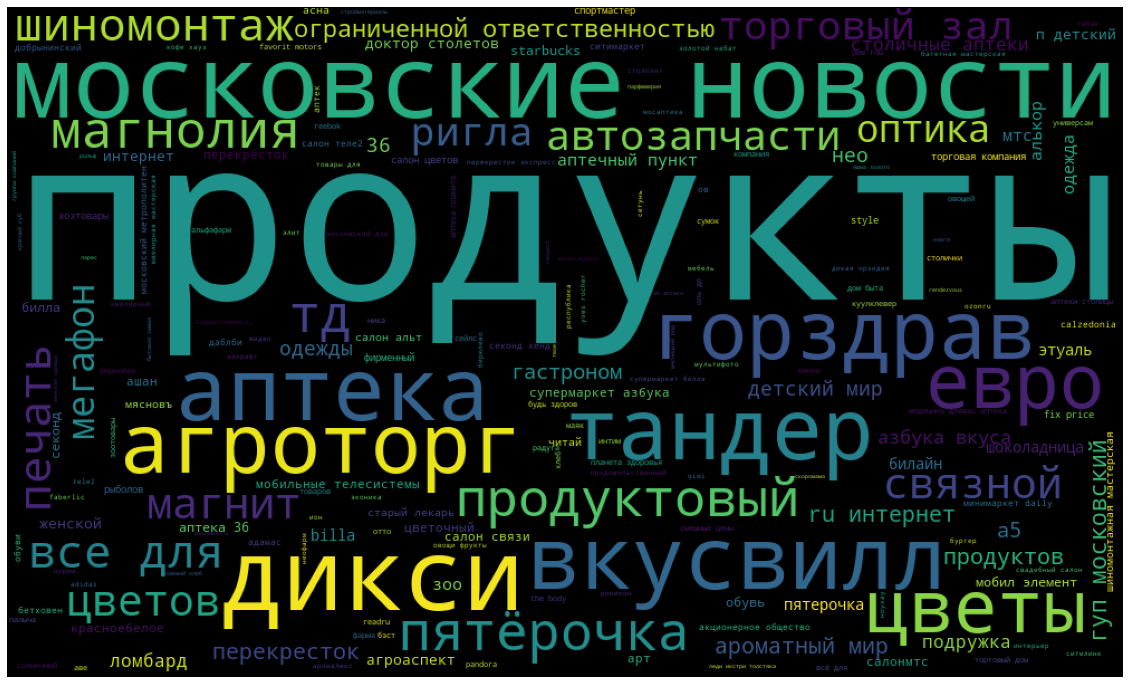

In [321]:
#!M
from wordcloud import WordCloud

wordcloud = WordCloud(width=1000, height=600, random_state=0).generate_from_frequencies(titles)

plt.figure(figsize=(20, 15))
plt.imshow(wordcloud)
plt.axis('off');

In [ ]:
#!M


In [ ]:
#!M


In [ ]:
#!M


Частотность слов в адресах

In [336]:
#!M
addresses = {}

for address in tqdm(test.address.values):
    
    try:
    
        text = re.findall(r'[A-Z|a-z|А-Я|а-я|0-9]\w+', address)
        p = ''
        for x in text:
            p+=" "+x
        text = p
        text = text.lower()
        text = re.sub(r'[\.,]+', '', text)
        text = re.sub(r"\(.*\)", ' ', text)
        text = re.sub(r"[^\w\s]", ' ', text)
        text = re.sub(r'\b\w\b', ' ', text)
        text = ' '.join(text.split())
        
        if text in addresses:
            addresses[text] += 1
        else:
            addresses[text] = 0
        
    except:
        continue
        
len(addresses.keys())

100%|██████████| 15771/15771 [00:00<00:00, 85003.62it/s]


7738

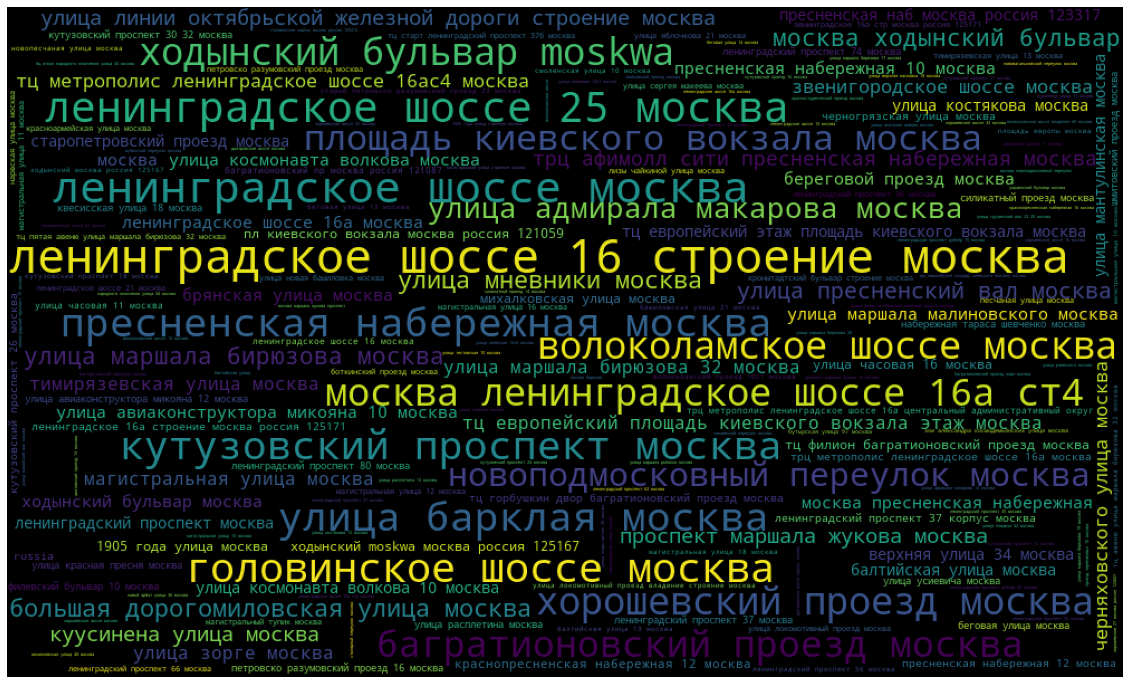

In [337]:
#!M
from wordcloud import WordCloud

wordcloud = WordCloud(width=1000, height=600, random_state=0).generate_from_frequencies(addresses)

plt.figure(figsize=(20, 15))
plt.imshow(wordcloud)
plt.axis('off');

In [ ]:
#!M


In [ ]:
#!M


In [ ]:
#!M


In [ ]:
#!M


In [ ]:
#!M


In [ ]:
#!M


In [ ]:
#!M


In [ ]:
#!M


In [ ]:
#!M


In [ ]:
#!M


In [ ]:
#!M


In [ ]:
#!M


In [ ]:
#!M


In [ ]:
#!M


In [ ]:
#!M


In [ ]:
#!M
